<a href="https://colab.research.google.com/github/djamoreland/Quantitative-Neuroscience-Moreland/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats


Age	Wing Length
3	1.4
4	1.5
5	2.2
6	2.4
7	3.1
8	3.2
9	3.2
11	3.9
12	4.1
14	4.7
15	4.5
16	5.2
17	5.0

In [7]:
ages = range(3,16,1)
Wing_length = [1.4,1.5,2.2,2.4,3.1,3.2,3.2,3.9,4.1,4.7,4.5,5.2,5.0]
for age in ages:
  print(age)

3
4
5
6
7
8
9
10
11
12
13
14
15


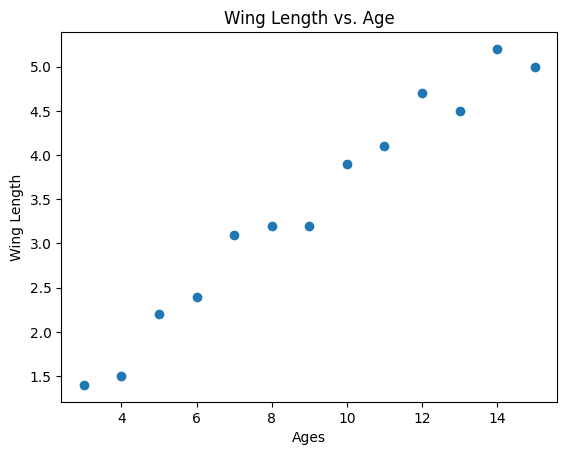

In [11]:
#1. Plot the relationship between Age and Wing Length.
plt.scatter(ages,Wing_length)
plt.xlabel('Ages')
plt.ylabel('Wing Length')
plt.title('Wing Length vs. Age')
plt.show()
plt.close()

Text(0, 0.5, 'Wing Length')

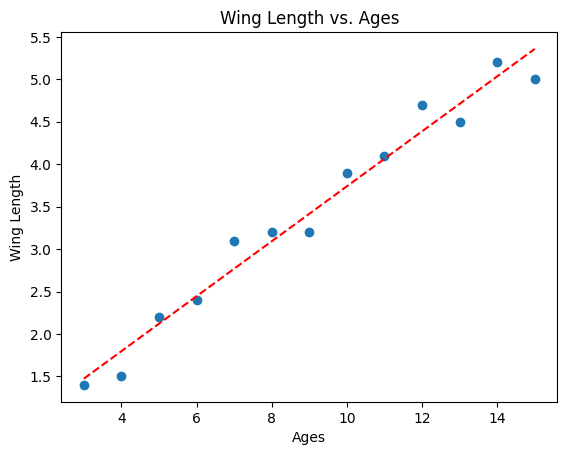

In [29]:
#2. Calculate and plot the regression line.


#Calculate summed products of x and y and squared x
prod_list = []
square_list = []
j = 0
for i in ages:
  prod = i*Wing_length[j]
  j +=1
  prod_list.append(prod)

  square = i**2
  square_list.append(square)

prod=sum(prod_list)
square = (sum(square_list))

#Calculate Slope
top_row = prod-((sum(ages)*sum(Wing_length))/len(ages))
bottom_row = square-(((sum(ages))**2)/len(ages))
slope = top_row / bottom_row
b = slope

#Calculate Intecept
intercept = np.mean(Wing_length) - (b*np.mean(ages))
a = intercept

#Calculate Predicted y-values
y_pred = []
for age in ages:
  new_y = a + b*age
  y_pred.append(new_y)

#Plot
plt.scatter(ages,Wing_length)
plt.plot(ages,y_pred,color = 'red', linestyle = '--')
plt.title('Wing Length vs. Ages')
plt.xlabel('Ages')
plt.ylabel('Wing Length')


In [42]:
#3. Can you reject H0: b = 0
?
F_stat, p = stats.f_oneway(ages,Wing_length)

print(f'The p_value is {p} which is below an alpha of 0.05, so we can reject the null hypothesis that b = 0')

The p_value is 5.19758210871867e-05


[np.float64(36.0), np.float64(25.0), np.float64(16.0), np.float64(9.0), np.float64(4.0), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(4.0), np.float64(9.0), np.float64(16.0), np.float64(25.0), np.float64(36.0)]
The confidence interval is from -0.33999562138594075 to 0.9872483686386877


Text(0, 0.5, 'Wing Length')

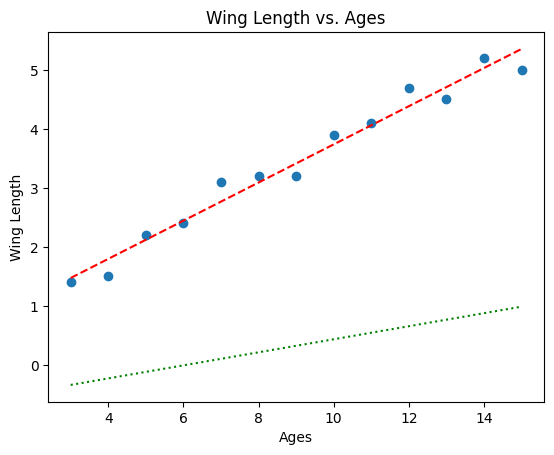

In [57]:
#4. Calculate and plot the confidence intervals on the slope of the regression.

#Find SSE and MSE

square_sum_list = []
for age in ages:
  square_sum = (age - np.mean(ages))**2
  square_sum_list.append(square_sum)

SSE = sum(square_sum_list)
MSE = SSE/ (len(ages) - 2)

#Calculate t_stat
t_stat = abs(stats.t.ppf((0.05 / 2), (len(ages) - 2)))

#Calculate upper and lower bounds
upper_bound = b + t_stat * np.sqrt(MSE / SSE)
lower_bound = b - t_stat * np.sqrt(MSE / SSE)

print(f'The confidence interval is from {lower_bound} to {upper_bound}')

CI = np.linspace(lower_bound,upper_bound,len(ages))
#Plot
plt.scatter(ages,Wing_length)
plt.plot(ages,y_pred,color = 'red', linestyle = '--')
plt.plot(ages,CI,color = 'green', linestyle = ':')
plt.title('Wing Length vs. Ages')
plt.xlabel('Ages')
plt.ylabel('Wing Length')


In [67]:
#4/6. Calculate r and r2 (the coefficient of determination)

#Compute r

age_sum_list = []
Wing_sum_list = []
prod_sum_list = []

for i in range(len(Wing_length)):
  age_sum = (ages[i] - np.mean(ages))**2
  Wing_sum = (Wing_length[i] - np.mean(Wing_length))**2
  prod = (ages[i] - np.mean(ages)) * (Wing_length[i] - np.mean(Wing_length))

  age_sum_list.append(age_sum)
  Wing_sum_list.append(Wing_sum)
  prod_sum_list.append(prod)

age_sum = sum(age_sum_list)
Wing_sum = sum(Wing_sum_list)
prod = sum(prod_sum_list)

#Find r and r2
top_row = prod
bottom_row = (np.sqrt(age_sum)) * (np.sqrt(Wing_sum))
r = top_row / bottom_row

r2 = r**2

print(f'Pearsons r is {r}')
print(f' The coefficient of determination is {r2}')

Pearsons r is 0.9847405724419813
 The coefficient of determination is 0.9697139950133611


Text(0, 0.5, 'Wing Length')

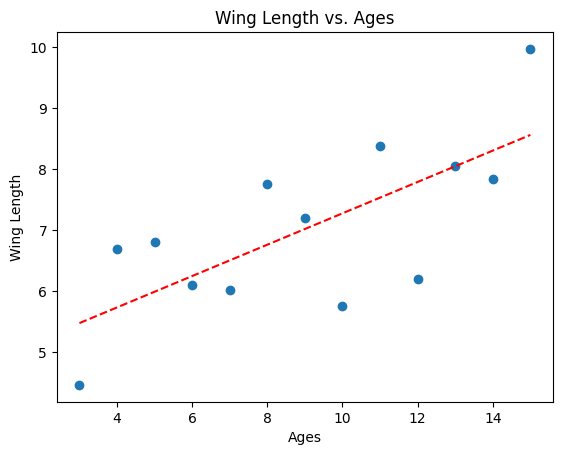

In [73]:
#7. Add some noise

mu = np.mean(Wing_length)
sigma = np.std(Wing_length)
noise = np.random.normal(mu, sigma, len(Wing_length))

new_WL = Wing_length + noise

#Calculate summed products of x and y and squared x
prod_list = []
square_list = []
j = 0
for i in ages:
  prod = i*new_WL[j]
  j +=1
  prod_list.append(prod)

  square = i**2
  square_list.append(square)

prod=sum(prod_list)
square = (sum(square_list))

#Calculate Slope
top_row = prod-((sum(ages)*sum(new_WL))/len(ages))
bottom_row = square-(((sum(ages))**2)/len(ages))
slope = top_row / bottom_row
b = slope

#Calculate Intecept
intercept = np.mean(new_WL) - (b*np.mean(ages))
a = intercept

#Calculate Predicted y-values
y_pred = []
for age in ages:
  new_y = a + b*age
  y_pred.append(new_y)

#Plot
plt.scatter(ages,new_WL)
plt.plot(ages,y_pred,color = 'red', linestyle = '--')
plt.title('Wing Length vs. Ages')
plt.xlabel('Ages')
plt.ylabel('Wing Length')
